In [1]:
%run parse_email_active_users.py
email_addr='anna.chystiakova@oracle.com'
email_pswd='!Tssa2016'
email_path='INBOX/'
subject_expr='Weekly_active_users_for_all_companies.'
source_path="/home/annac/"
leter_path=source_path+'emails/'
get_week_act_users(email_addr, email_pswd, email_path, subject_expr,leter_path) 

login to E-mail : OK


In [112]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 30 13:54:02 2016

@author: anna
"""
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages/')

import pandas as pd
import numpy as np
import datetime
from os import listdir
from os.path import isfile, join
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import logging
import IPython
from IPython.display import display, HTML
%run load_sar_data.py
%run parse_sar_data.py
%run load_forecast.py

In [114]:
#Input data
#Source path for local data storage
#The path contains the tmp, emails, results subfolders
source_path="/home/annac/"
path="/home/annac/tmp/"
#Email data 
email_addr='anna.chystiakova@oracle.com'
email_pswd='!Tssa2016'
email_path='INBOX/'
subject_expr='Weekly_active_users_for_all_companies.'
leter_path=source_path+'emails/'
#Data to access the remote hosts
#Username
user="annac"
#Pasword for remote hosts
password="ITssa2016"

#Start date of analysis
start="2016-07-16 00:00:00 AM"
#End date of analysis
end="2016-07-26 00:00:00 AM"

Prepare data about hosts, Groups, Classes from CMDB with corrections

In [107]:
def complete_data(data, col_origin):
    data=data[col_origin]
    data.columns=['Group', 'server']
    gr=""
    for i in data.index:
        if type(data['Group'].values[i])==float and np.isnan(data['Group'].values[i]):
            data['Group'][i]=gr
        else:
            gr=data['Group'][i]
    data=data[~data.Group.isin(['none', 'no information'])]
    return data

D_add=pd.read_excel(source_path+"VM_data.xls", sheetname='Add_to_CMDB')
D_add=complete_data(D_add,col_origin=["Group", "summary"])
D_remove=pd.read_excel(source_path+"VM_data.xls", sheetname='Remove_from_CMDB')
D_remove=complete_data(D_remove,col_origin=["Server Group", "Server Name"])
D=pd.read_excel(source_path+"VM_data.xls", sheetname='Prod_CMDB')
D=complete_data(D,col_origin=["Group", "Server"])
D_SG5=pd.read_excel(source_path+"VM_data.xls", sheetname='SG5_hosts')
D_SG5=complete_data(D_SG5,col_origin=["Group", "Server"])

D=D[~D.server.isin(D_remove.server.values)]
D=D.append(D_add)
D=D.append(D_SG5)
D=D.drop_duplicates()
if D.server.duplicated().any()==True:
    print('There are duplicated Server names!!!')
All_Groups=D.Group.unique()
All_Groups_PROD=[x for  x in All_Groups if 'PROD' in x]
All_Groups_TEST=[x for  x in All_Groups if 'TEST' in x]
All_Groups_SHARED=[x for  x in All_Groups if 'SHARED' in x]
Classes=[x.split("-PROD-")[0] for x in All_Groups_PROD]
Classes=pd.unique(Classes)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


In [108]:
Sclass=Classes[10]
NET='PROD'
Ds=D[D.Group.str.contains(NET)]
Ds=Ds[Ds.Group.str.contains(Sclass)]


Analysis for Class of hosts ETA-ST
st001.eta.prod.ed1
('OS is:', [u'FreeBSD'])
st002.eta.prod.ed1
('OS is:', [u'FreeBSD'])
st101.eta.prod.ed1
('OS is:', [u'Linux'])
Len of unique data less than number of clusters


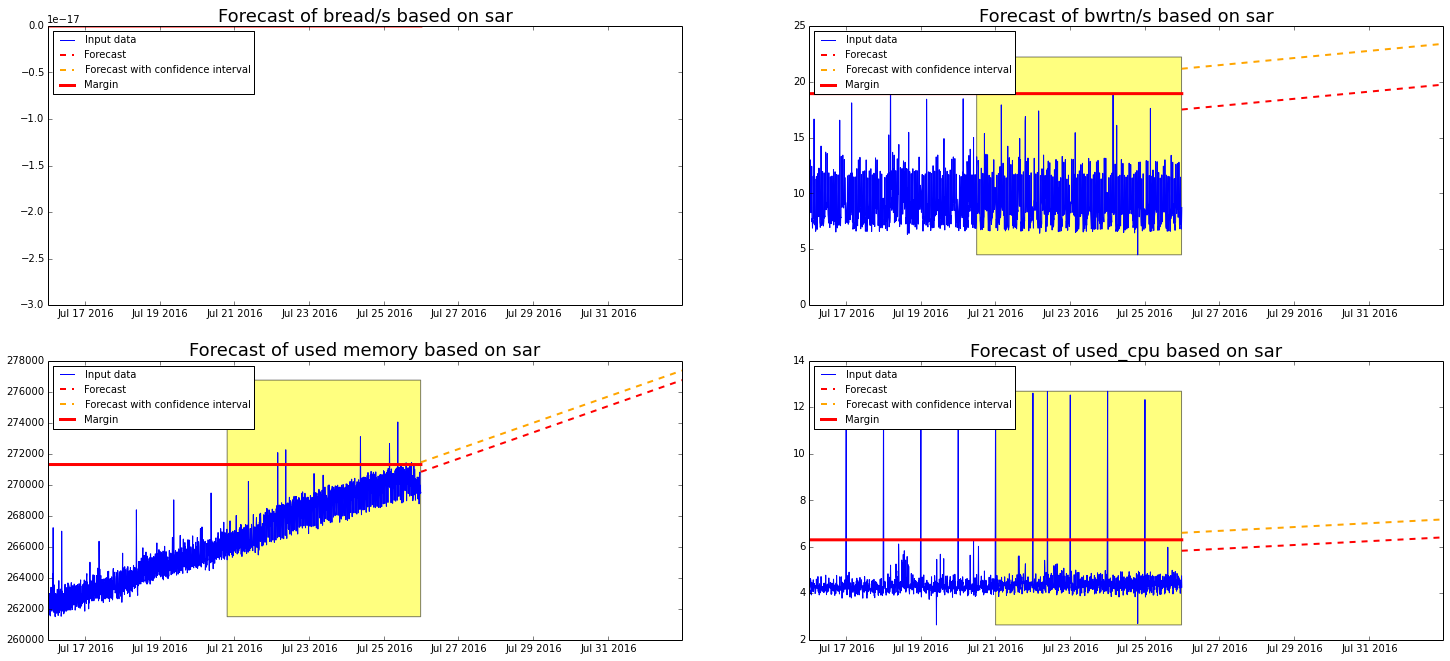

st102.eta.prod.ed1
('OS is:', [u'Linux'])


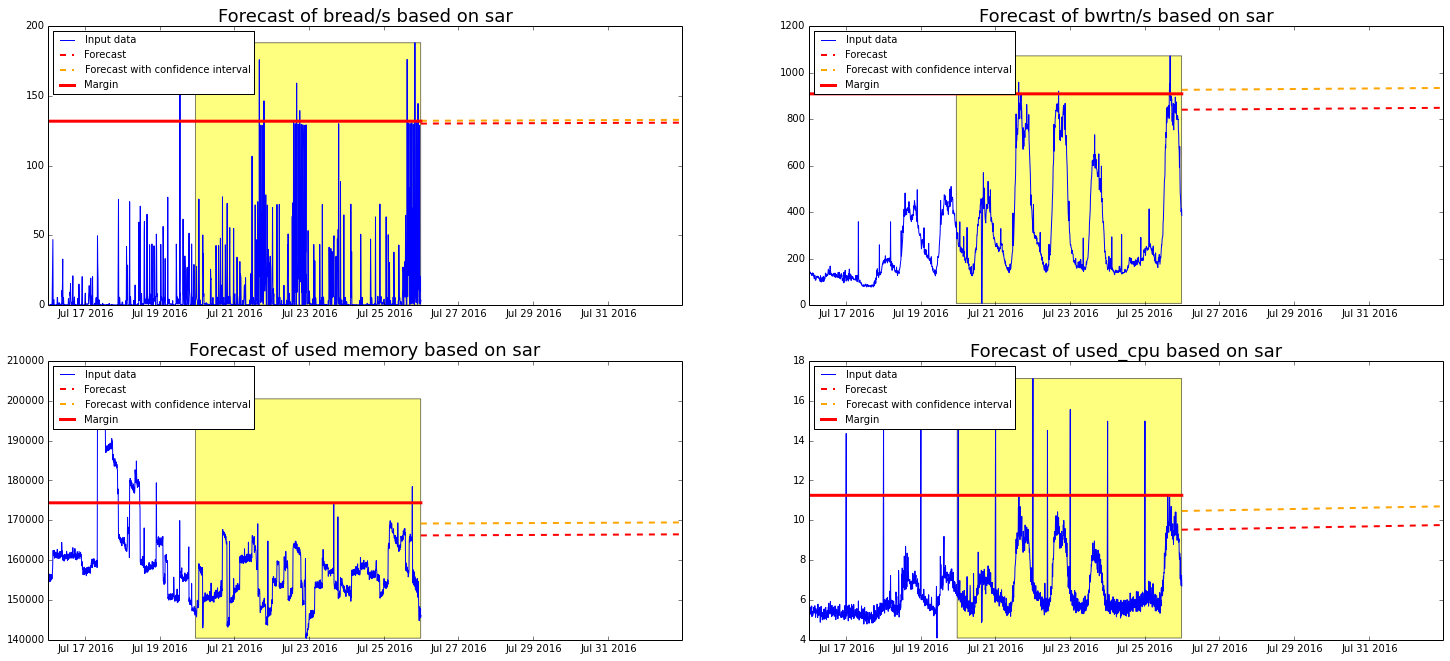

st001.eta.prod.ed2
('OS is:', [u'FreeBSD'])
st002.eta.prod.ed2
('OS is:', [u'FreeBSD'])
st101.eta.prod.ed2
('OS is:', [u'Linux'])
Len of unique data less than number of clusters


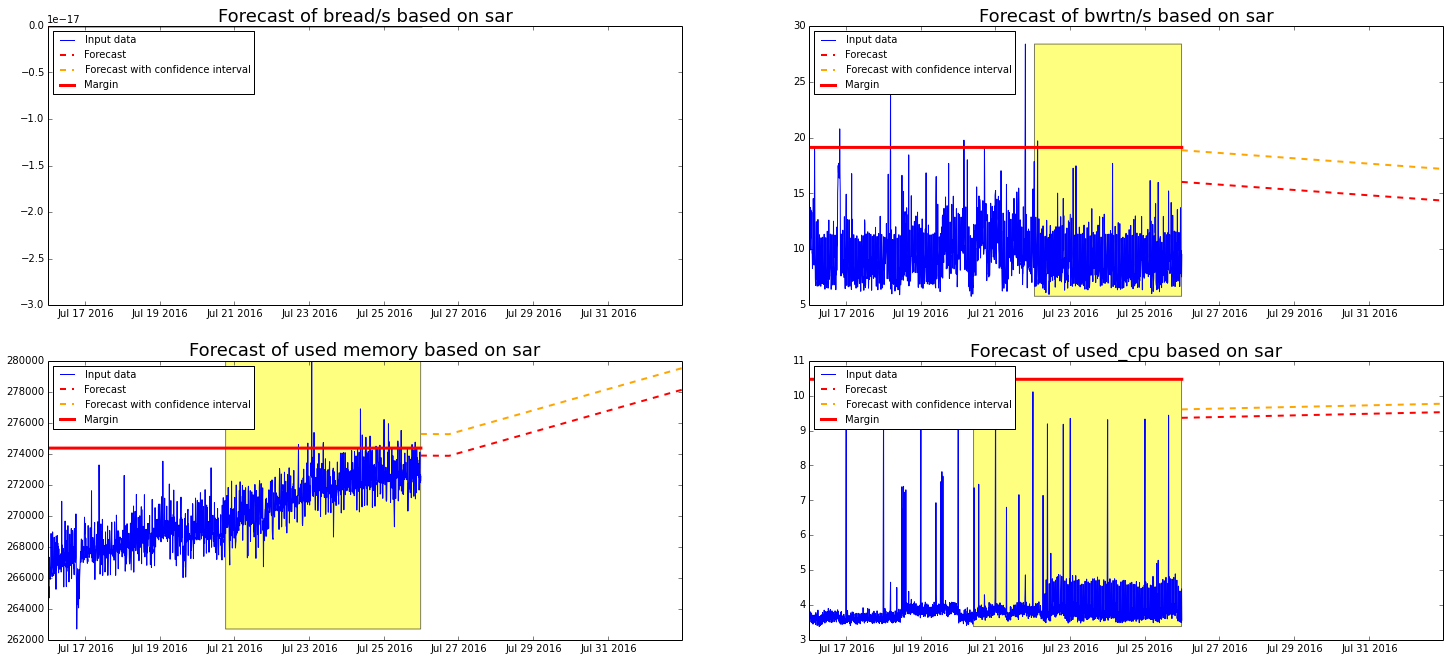

st102.eta.prod.ed2
('OS is:', [u'Linux'])
Len of unique data less than number of clusters


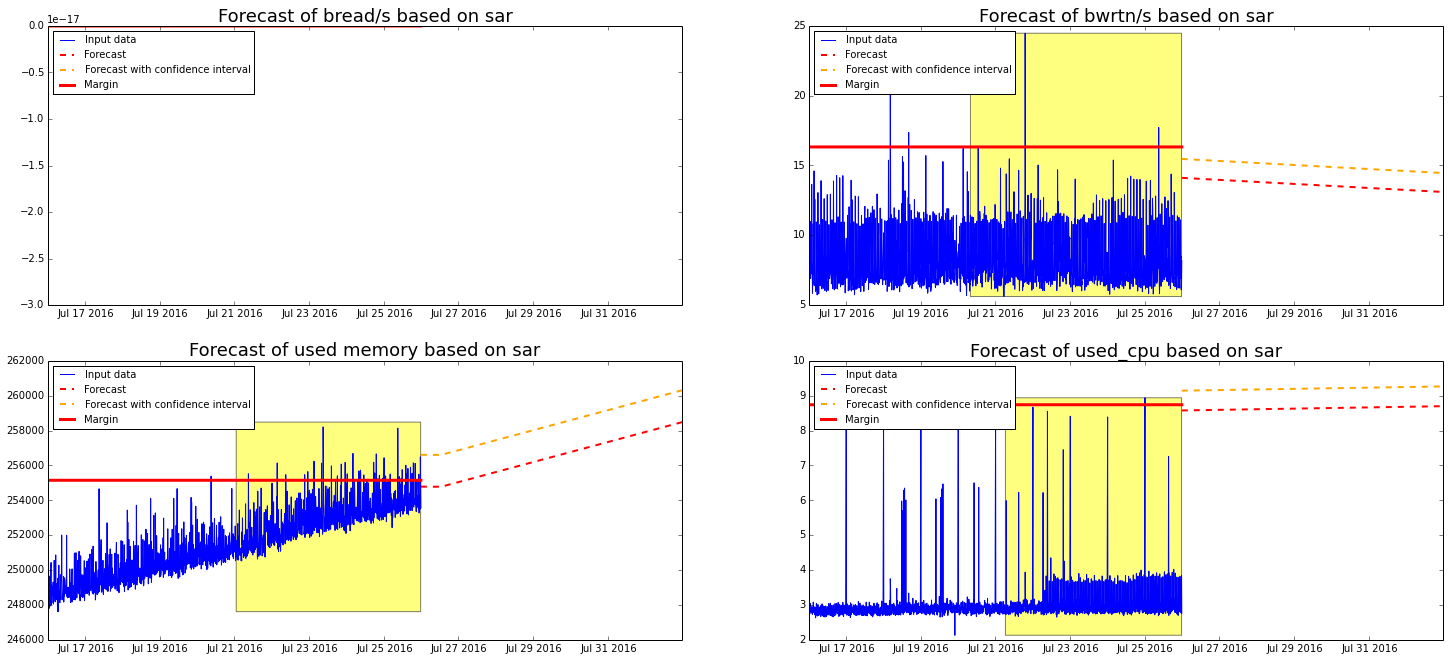

st001.eta.prod.ed5
('OS is:', [u'FreeBSD'])
st002.eta.prod.ed5
('OS is:', [u'FreeBSD'])
st101.eta.prod.ed5
('OS is:', [u'Linux'])


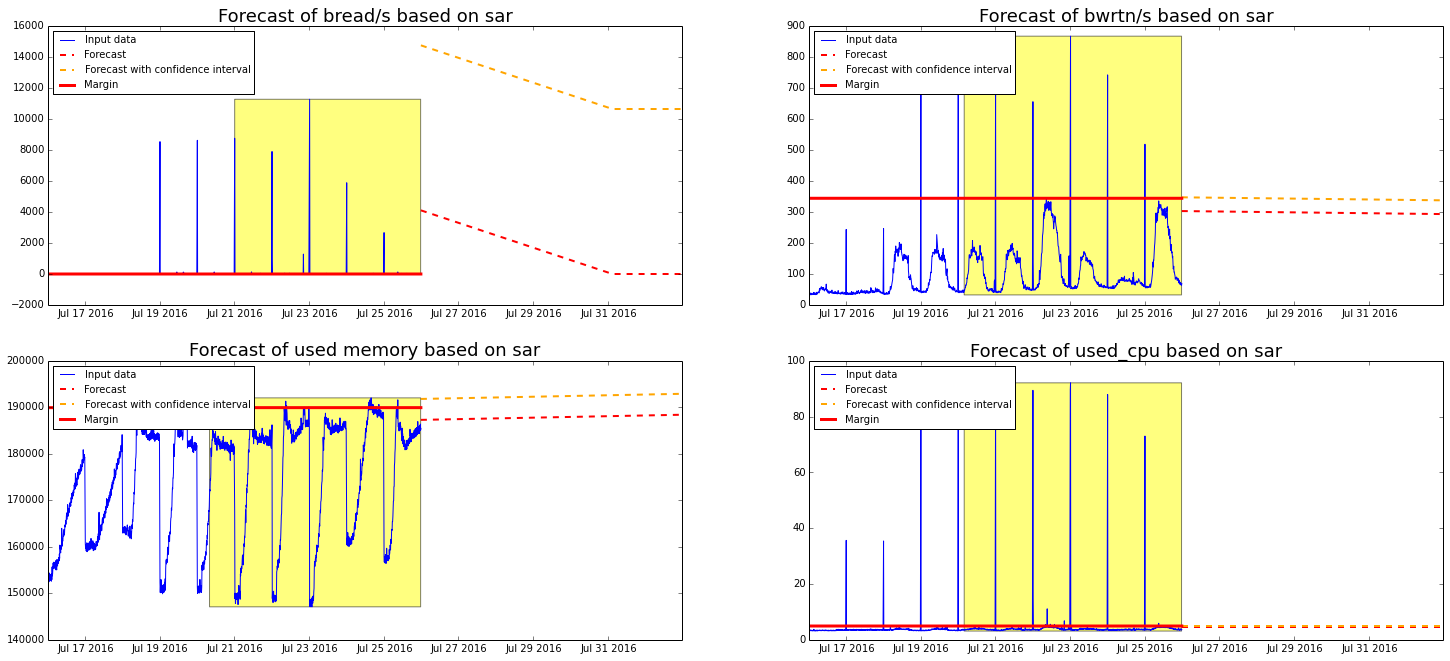

st102.eta.prod.ed5
('OS is:', [u'Linux'])
Len of unique data less than number of clusters


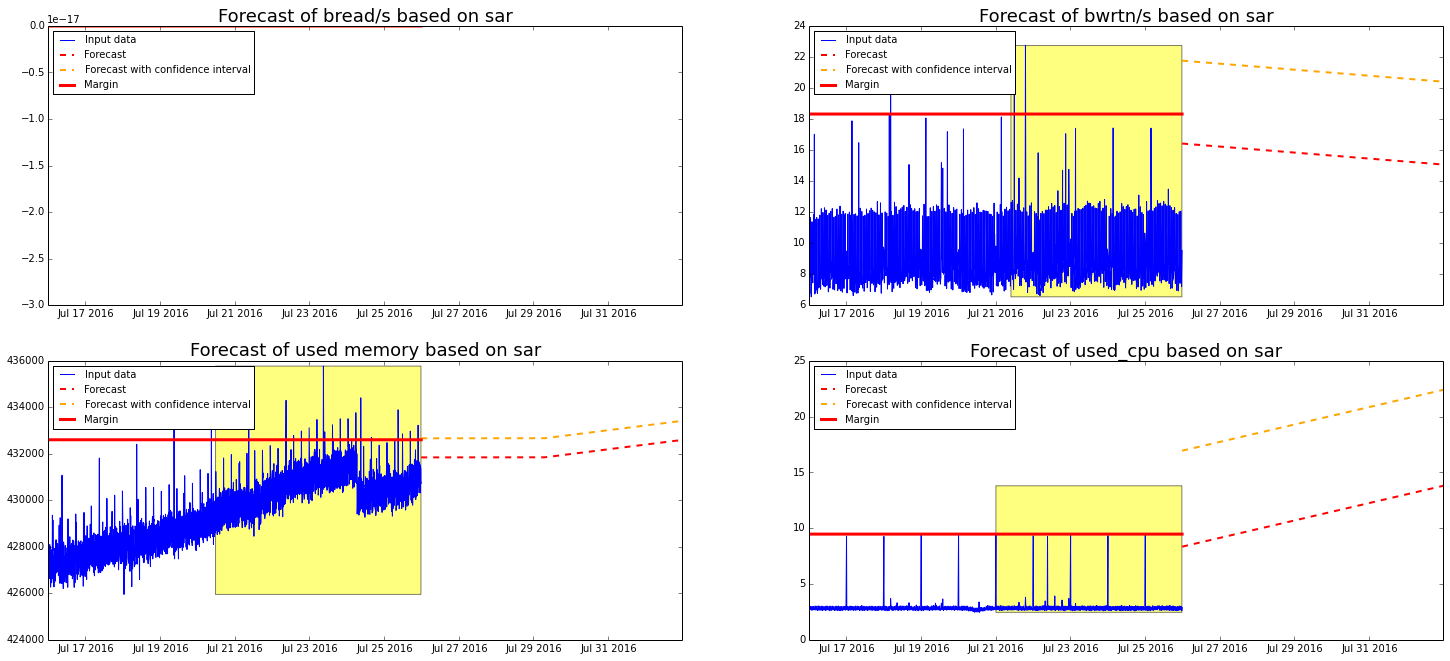

ST001.ETA.PROD.ED1
('OS is:', [u'FreeBSD'])
ST002.ETA.PROD.ED1
('OS is:', [u'FreeBSD'])
ST001.ETA.PROD.ED2
('OS is:', [u'FreeBSD'])
ST002.ETA.PROD.ED2
('OS is:', [u'FreeBSD'])
ST001.ETA.PROD.ED5
('OS is:', [u'FreeBSD'])
ST002.ETA.PROD.ED5
('OS is:', [u'FreeBSD'])


In [117]:
Sclass=Classes[20]
NET='PROD'
Ds=D[D.Group.str.contains(NET)]
Ds=Ds[Ds.Group.str.contains(Sclass)]
DF=pd.DataFrame()
print('Analysis for Class of hosts '+Sclass)
for host in Ds['server']:
    print host
    r=get_host_data (host, user, password)
    if r==0:
        continue
    get_resource_tables(path+host)
    R=forecast_on_sar(host, user, path=path, start=start, end=end, plot_clust=False)
    DF=DF.append(R)

ETA-ST-PROD-ED1-101


<string>:375: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


,Group,Number,Resource,Sum_capacity,Sum_used
0,ETA-ST-PROD-ED1-101,2,Memory,4,2.000000
1,ETA-ST-PROD-ED1-101,2,CPU,400,17.546875


Summary CPU 
Used 4.38671875 %
Summary RAM 
Used 50.0 %
ETA-ST-PROD-ED2-101


,Group,Number,Resource,Sum_capacity,Sum_used
0,ETA-ST-PROD-ED2-101,2,Memory,4,2.00000
1,ETA-ST-PROD-ED2-101,2,CPU,400,19.21875


Summary CPU 
Used 4.8046875 %
Summary RAM 
Used 50.0 %
ETA-ST-PROD-ED5-101


,Group,Number,Resource,Sum_capacity,Sum_used
0,ETA-ST-PROD-ED5-101,2,Memory,4,2.00000
1,ETA-ST-PROD-ED5-101,2,CPU,400,14.40625


Summary CPU 
Used 3.6015625 %
Summary RAM 
Used 50.0 %


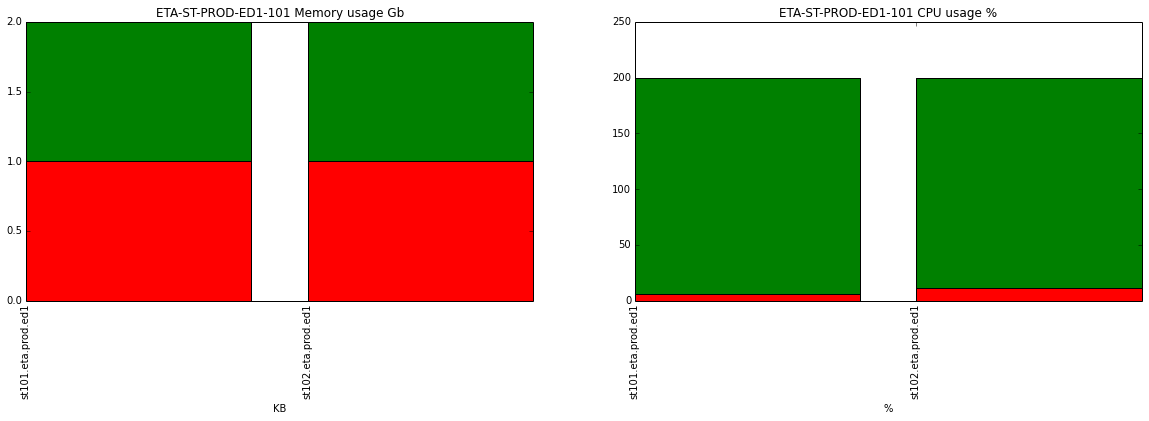

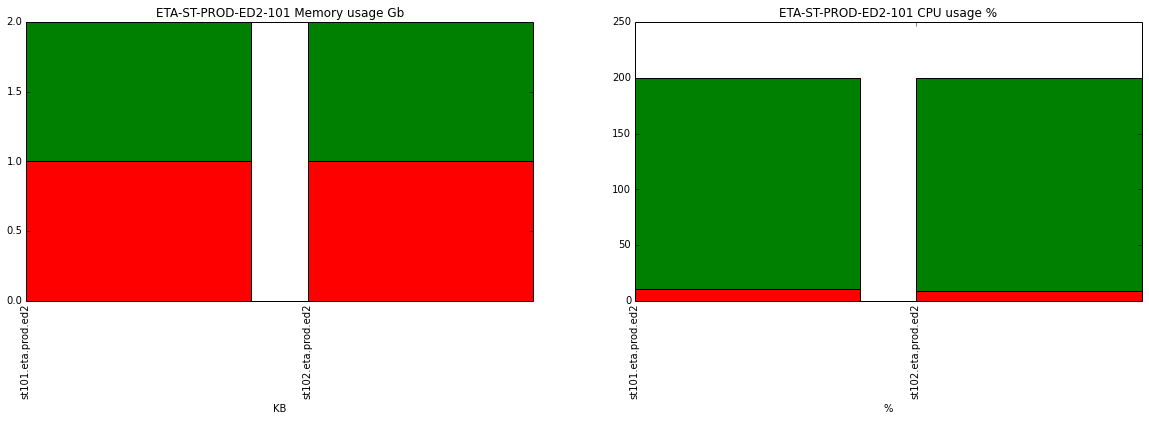

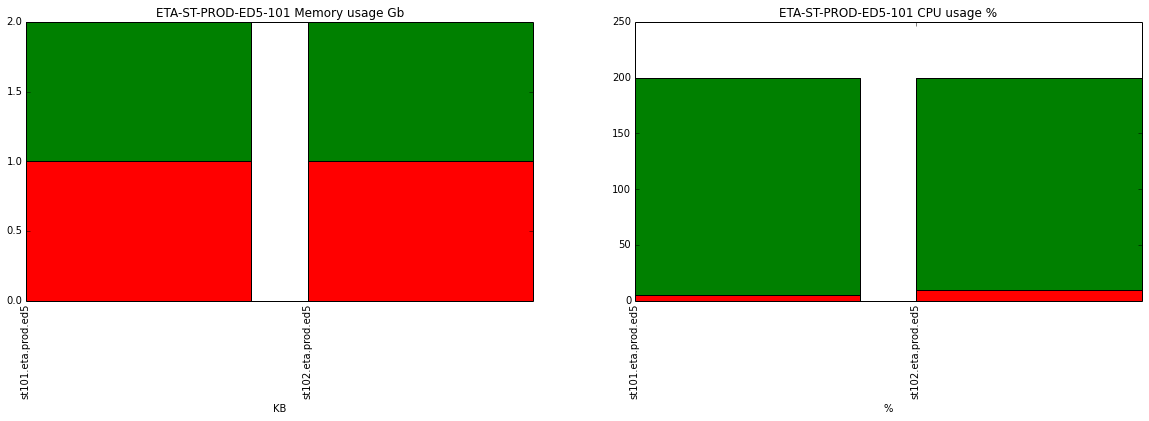

In [122]:
%run load_forecast.py
DFR_CPU=pd.DataFrame()
DFR_RAM=pd.DataFrame()
for h in DF.index.unique():
    d=DF.loc[h]
    d=d[d['Param'].str.contains('real_used')]
    d=d[d.Used==max(d.Used)]
    DFR_RAM=DFR_RAM.append(d)
    d=DF.loc[h]
    d=d[d['Param']=='used_cpu']
    DFR_CPU=DFR_CPU.append(d)
DFR_RAM['server']=DFR_RAM.index.values
DFR_CPU['server']=DFR_CPU.index.values
DFR_RAM['Available']=[np.round(np.float16(DFR_RAM.loc[i]['Capacity'])-np.float16(DFR_RAM.loc[i]['Used']),2) \
                      for i in DFR_RAM.index]
DFR_CPU['Available']=[np.round(np.float16(DFR_CPU.loc[i]['Capacity'])*100-np.float16(DFR_CPU.loc[i]['Used'].replace(' %', '')),2) \
                      for i in DFR_CPU.index]
DFR_CPU=pd.merge(DFR_CPU, D)
DFR_RAM=pd.merge(DFR_RAM, D)
F=get_resource_data(Sclass,DFR_RAM=DFR_RAM, DFR_CPU=DFR_CPU)

In [123]:
%run plot_class_data.py
DFR_CPU_d=DFR_CPU[['Capacity', 'Details', 'Resource','Used', 'server', 'Available']]
DFR_CPU_d.columns=['Capacity_cpu', 'Details_cpu', 'Resource','Used_cpu', 'server', 'Available_cpu']
DFR_RAM_d=DFR_RAM[['Capacity', 'Details', 'Resource','Used', 'server', 'Available', 'Group']]
DFR_RAM_d.columns=['Capacity_mem', 'Details_mem', 'Resource','Used_mem', 'server', 'Available_mem', 'Group']
D=DFR_CPU_d.merge(DFR_RAM_d, on='server')
RES=pd.DataFrame()
for G in D.Group.unique():
    d=D[D.Group==G]
    d['util_mem']=100*d['Used_mem']/d['Capacity_mem']
    d['util_cpu']=[np.float16(x.replace(' %','')) for x in d['Used_cpu']]
    
    min_util_mem=min(d['util_mem'])
    max_util_mem=max(d['util_mem'])
    avg_util_mem=100*(sum(d['Used_mem'])/sum(d['Capacity_mem']))
    sum_utilized_mem=sum(d['Used_mem'])
    s=d['Capacity_mem'].unique()
    mem_per_fost=','.join(str(x) for x in s )
    
    min_util_cpu=min(d['util_cpu'])
    max_util_cpu=max(d['util_cpu'])
    avg_util_cpu=100*(sum(d['util_cpu'])/sum(100*d['Capacity_cpu']))
    sum_utilized_cpu=sum(d['util_cpu'])
    s1=d['Capacity_cpu'].unique()
    cpu_per_fost=','.join(str(x) for x in s1 )
    RES=RES.append({'Server_class':G, 'Number_of_hosts':d.shape[0],'Mem_min_utilized':min_util_mem, \
                    'Mem_max_utilized':max_util_mem, 'Mem_avg_clust':avg_util_mem, 'Config_mem':mem_per_fost,\
                    'Mem_Sum_utilized': sum_utilized_mem,\
                   'CPU_min_utilized':min_util_cpu, \
                    'CPU_max_utilized':max_util_cpu, 'CPU_avg_clust':avg_util_cpu, 'Config_cpu':cpu_per_fost,\
                    'CPU_Sum_utilized': sum_utilized_cpu},ignore_index=True)
plot_data(RES)

,CPU_Sum_utilized,CPU_avg_clust,CPU_max_utilized,CPU_min_utilized,Config_cpu,Config_mem,Mem_Sum_utilized,Mem_avg_clust,Mem_max_utilized,Mem_min_utilized,Number_of_hosts,Server_class
0,17.550781,4.387695,11.25000,6.300781,2.0,2.0,2,50,50,50,2,ETA-ST-PROD-ED1-101
1,19.210938,4.802734,10.46875,8.742188,2.0,2.0,2,50,50,50,2,ETA-ST-PROD-ED2-101
2,14.410156,3.602539,9.46875,4.941406,2.0,2.0,2,50,50,50,2,ETA-ST-PROD-ED5-101


In [149]:
Billing=pd.read_csv(leter_path+"result.csv", sep=';')
Billing=Billing[Billing.Date<=end]
Billing=Billing[Billing.Date==max(Billing.Date)]
Billing.users_number.sum()
MIA_Users=Billing[Billing.DC=='ed1'].users_number.sum()
MAD_Users=Billing[Billing.DC=='ed5'].users_number.sum()
CMDB=pd.read_excel(source_path+"Companies_16_2.xlsx", sheetname='All_CMDB')
CMDB=CMDB[['Instance ID','Instance Name','BE Master','Version']]
CMDB.columns=['Instance ID','Company','BE Master','Version']
#To resolve the inconsistencies in CMDB and Weekly reports (Company names)
Billing.loc[Billing.Company=='tim','Company']='timcelular'
list(set(CMDB.Company.values) - set(Billing.Company.values))

In [164]:
year=datetime.datetime.strptime(end[:10],"%Y-%m-%d").year
month=datetime.datetime.strptime(end[:10],"%Y-%m-%d").month
Month_bil=pd.read_excel(source_path+"Active_users_for_all_companies.xlsx", sheetname=str(year))
Month_bil.tail()

,Company,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
175,Brickman,98,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,Jennifer,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Sunrun,10,10,10,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,TOTAL :,142838,144989,154065,161279,161098,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
month

7

In [156]:
end

'2016-07-26 00:00:00 AM'

In [152]:
Billing.head()

,DB,Company,users_number,week,DC,Date
322,ed1srv45,cycle30,297,29,ed1,2016-07-23
499,ed1db18,cablevision,4058,29,ed1,2016-07-23
500,ed1db18,cox,8432,29,ed1,2016-07-23
731,db001,etadirectpro,1,29,NaN,2016-07-23
732,db001,voo,1212,29,NaN,2016-07-23
